<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>K-Means clustering with Python and Vantage</b>
</header>

### Disclaimer
TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## Introduction
##### The K-means() function groups a set of observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid). This algorithm minimizes the objective function, that is, the total Euclidean distance of all data points from the center of the cluster as follows:
            1. Specify or randomly select k initial cluster centroids.
            2. Assign each data point to the cluster that has the closest centroid.
            3. Recalculate the positions of the k centroids.
            4. Repeat steps 2 and 3 until the centroids no longer move.
        The algorithm doesn't necessarily find the optimal configuration as it
        depends significantly on the initial randomly selected cluster centers.
        User can run the function multiple times to reduce the effect of this limitation.

        Also, this function returns the within-cluster-squared-sum, which user can use to
        determine an optimal number of clusters using the Elbow method.
##### The KMeansPredict() function uses the cluster centroids in the KMeans() function output to assign the input data points to the cluster centroids.

Workflow steps:
1. Import the required teradataml modules.
2. Connect to a Vantage system.
3. Data Loading.
4. Data Analysis e.g. use of various dataframe functions to get details about the data like shape, fraudulent transaction count, non-fraudulent transaction counts etc.
5. Data Plot - Insight into the data by using plot()
6. KMeans Clustering.
7. Cleanup.

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Import the required modules.</b>

In [1]:
# Import.
import os
import getpass

from collections import OrderedDict

from teradataml import Axis, subplots, Figure
from teradataml.context.context import *
from teradataml.dataframe.dataframe import DataFrame
from teradataml import db_drop_table, read_csv, KMeans, KMeansPredict

from teradatasqlalchemy import (FLOAT, VARCHAR, INTEGER)


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to enter the host name, username and password.</p>

In [2]:
con = create_context(host=getpass.getpass("Hostname: "), 
                     username=getpass.getpass("Username: "),
                     password=getpass.getpass("Password: "))

Hostname:  ········
Username:  ········
Password:  ········


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3. Data Loading</b>

##### Data Source: https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/input
##### The dataset contains the basic information (ID, age, gender, income, spending score) about the customers.

In [3]:
# The read_csv() API loads data from CSV file into Teradata Vantage.
types = OrderedDict(CustomerID=INTEGER, Gender=VARCHAR, Age=INTEGER, Annual_income=INTEGER, 
                    Spending_Score=INTEGER)
df_mall = read_csv(filepath = getpass.getpass("filepath: "), table_name = 'mall_data', types=types)

filepath:  ········


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Data Analysis</b>

In [4]:
# Shape of the dataframe.
df_mall.shape

(200, 5)

In [5]:
# Print the dataframe.
df_mall

CustomerID,Gender,Age,Annual_income,Spending_Score
6,Female,22,17,76
10,Female,30,19,72
12,Female,35,19,99
14,Female,24,20,77
18,Male,20,21,66
20,Female,35,23,98
16,Male,22,20,79
8,Female,23,18,94
4,Female,23,16,77
2,Male,21,15,81


In [6]:
# Print a summary of the DataFrame. This shows there are no nulls in the data.
df_mall.info(null_counts=True)

<class 'teradataml.dataframe.dataframe.DataFrame'>
Data columns (total 5 columns):
CustomerID        200 non-null int
Gender            200 non-null str
Age               200 non-null int
Annual_income     200 non-null int
Spending_Score    200 non-null int
dtypes: int(4), str(1)


In [7]:
df_mall.describe()

func,CustomerID,Age,Annual_income,Spending_Score
min,1,18,15,1
std,57.879,13.969,26.265,25.824
25%,50.75,28.75,41.5,34.75
50%,100.5,36,61.5,50
75%,150.25,49,78,73
max,200,70,137,99
mean,100.5,38.85,60.56,50.2
count,200,200,200,200


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>5. Data Plot</b>

In [8]:
# Function to create a figure and a set of subplots. The function makes it convenient to create common layouts of subplots, including the enclosing figure object.
# This will help to create a figure with 2 subplots in 1 row. fig and axes is passed to plot(). 
fig, axes = subplots(nrows=1, ncols=3) 

In [9]:
p = df_mall.plot(x=df_mall.Annual_income, y=df_mall.Age, ax=axes[0], figure=fig, kind="scatter", title="Scatter plot of Annual Income v/s Age", style="green")
p = df_mall.plot(x=df_mall.Annual_income, y=df_mall.Spending_Score, ax=axes[1], figure=fig, kind="scatter", title="Scatter plot of Annual Income v/s Spending Score", style="red")
p = df_mall.plot(x=df_mall.Age, y=df_mall.Spending_Score, ax=axes[2], figure=fig, kind="scatter", title="Scatter plot of Age v/s Spending Score", style="blue")

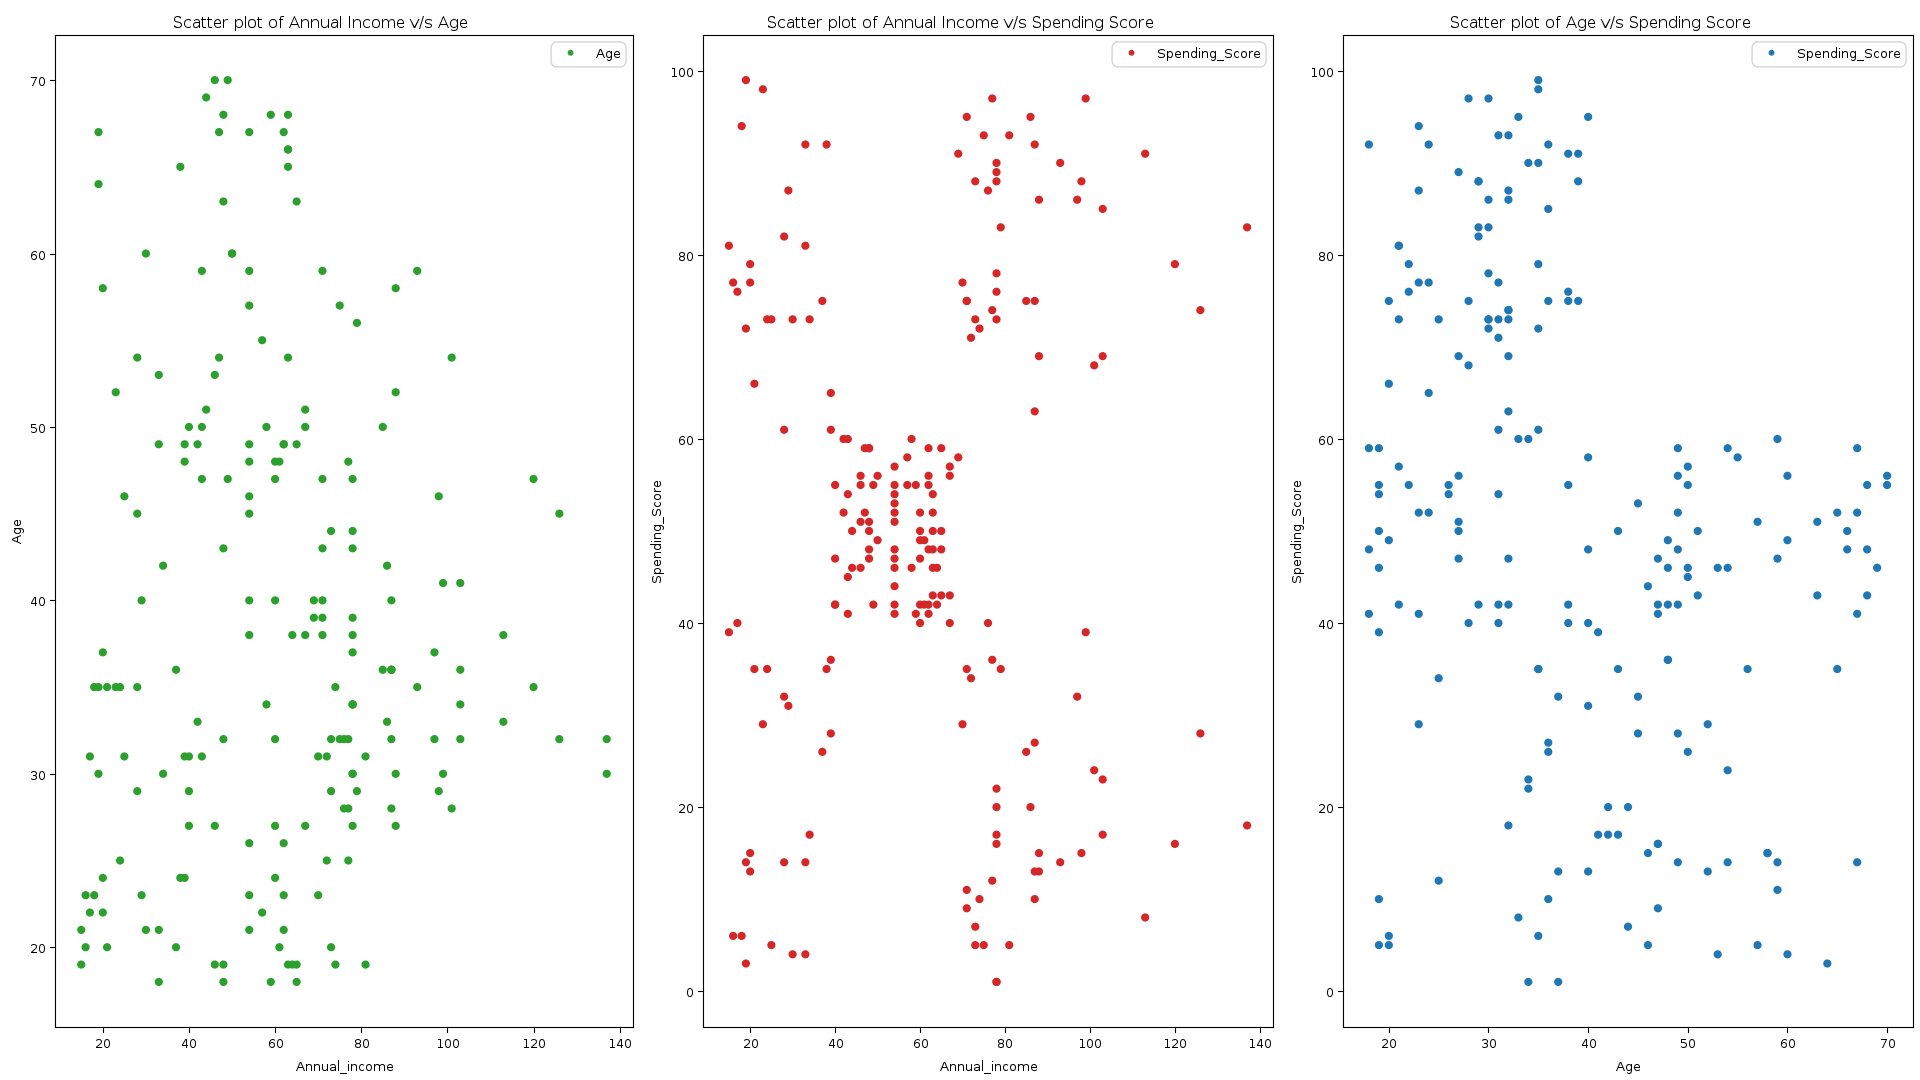

In [10]:
p.show()

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>6. KMeans Clustering</b>

## 2D Clustering based on Age and Annual Income.

### Number of clusters = 2.

In [11]:
KMeans_out = KMeans(id_column='CustomerID', 
                    target_columns=['Age', 'Annual_income'], 
                    data=df_mall, 
                    num_init=10, 
                    num_clusters=2, 
                    iter_max= 30
                   )

##### Output teradataml DataFrame attribute "result" gives following information: 
##### td_size_kmeans - The number of points in the cluster.
##### td_withinss_kmeans - The within-cluster-sum-of-squares, that is, the sum of squared differences of each point from its cluster centroid. 
##### td_modelinfo_kmeans - Information related to model: 
     ###### Converged: True or False
     ###### Number of Iterations: The number of iterations performed by the function.
     ###### Number of Clusters: The number of clusters produced.
     ###### Total_WithinSS: The total within cluster sum of squares.

In [12]:
KMeans_out.result

td_clusterid_kmeans,Age,Annual_income,td_size_kmeans,td_withinss_kmeans,CustomerID,td_modelinfo_kmeans
None,None,None,None,None,None,Total_WithinSS : 8.71215659147870E+04
None,None,None,None,None,None,Number of Clusters : 2
None,None,None,None,None,None,Converged : True
0,42.21904761904762,40.78095238095238,105,49803.92380952381,None,None
None,None,None,None,None,None,Between_SS : 8.89872140852130E+04
None,None,None,None,None,None,Number of Iterations : 8
1,35.126315789473686,82.42105263157895,95,37317.64210526319,None,None


In [13]:
KMeans_out.model_data

td_clusterid_kmeans,Age,Annual_income,td_size_kmeans,td_withinss_kmeans,CustomerID,td_modelinfo_kmeans
None,None,None,None,None,None,Converged : True
None,None,None,None,None,None,Number of Clusters : 2
None,None,None,None,None,None,Total_WithinSS : 8.71215659147870E+04
None,None,None,None,None,None,Between_SS : 8.89872140852130E+04
None,None,None,None,None,None,Number of Iterations : 8
1,35.126315789473686,82.42105263157895,95,37317.64210526319,None,None
0,42.21904761904762,40.78095238095238,105,49803.92380952381,None,None


In [14]:
# The KMeansPredict() function uses the cluster centroids in the KMeans() function output to assign the input data points to the cluster centroids.
KMeansPredict_out = KMeansPredict(object=KMeans_out, data=df_mall, accumulate=['Gender', 'Age', 'Annual_income', 'Spending_Score'])

In [15]:
KMeansPredict_out.result

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
6,0,Female,22.0,17.0,76
10,0,Female,30.0,19.0,72
12,0,Female,35.0,19.0,99
1,0,Male,19.0,15.0,39
5,0,Female,31.0,17.0,40
7,0,Female,35.0,18.0,6
9,0,Male,64.0,19.0,3
11,0,Male,67.0,19.0,14
3,0,Female,20.0,16.0,6
8,0,Female,23.0,18.0,94


In [16]:
# Create dataframe with td_clusterid_kmeans = 0.
dfc1 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 0]
dfc1

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
6,0,Female,22.0,17.0,76
10,0,Female,30.0,19.0,72
12,0,Female,35.0,19.0,99
1,0,Male,19.0,15.0,39
5,0,Female,31.0,17.0,40
7,0,Female,35.0,18.0,6
9,0,Male,64.0,19.0,3
11,0,Male,67.0,19.0,14
3,0,Female,20.0,16.0,6
8,0,Female,23.0,18.0,94


In [17]:
# Create dataframe with td_clusterid_kmeans = 1.
dfc2 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 1]
dfc2

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
98,1,Female,27.0,60.0,50
104,1,Male,26.0,62.0,55
106,1,Female,21.0,62.0,42
101,1,Female,23.0,62.0,41
115,1,Female,18.0,65.0,48
119,1,Female,51.0,67.0,43
121,1,Male,27.0,67.0,56
123,1,Female,40.0,69.0,58
113,1,Female,38.0,64.0,42
100,1,Male,20.0,61.0,49


In [18]:
# Function to create a figure and a set of subplots. The function makes it convenient to create common layouts of subplots, including the enclosing figure object.
# This will help to create a figure with 2 subplots in 1 row. fig and axes is passed to plot(). 
fig, axes = subplots(nrows=1, ncols=2)

In [19]:
p = df_mall.plot(x=dfc1.Age, y=dfc1.Annual_income, ax=axes[0], xlim=(0,80), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 0: Age v/s Annual Income", style="green")
p = df_mall.plot(x=dfc2.Age, y=dfc2.Annual_income, ax=axes[1], xlim=(0,80), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 1: Age v/s Annual Income", style="red")

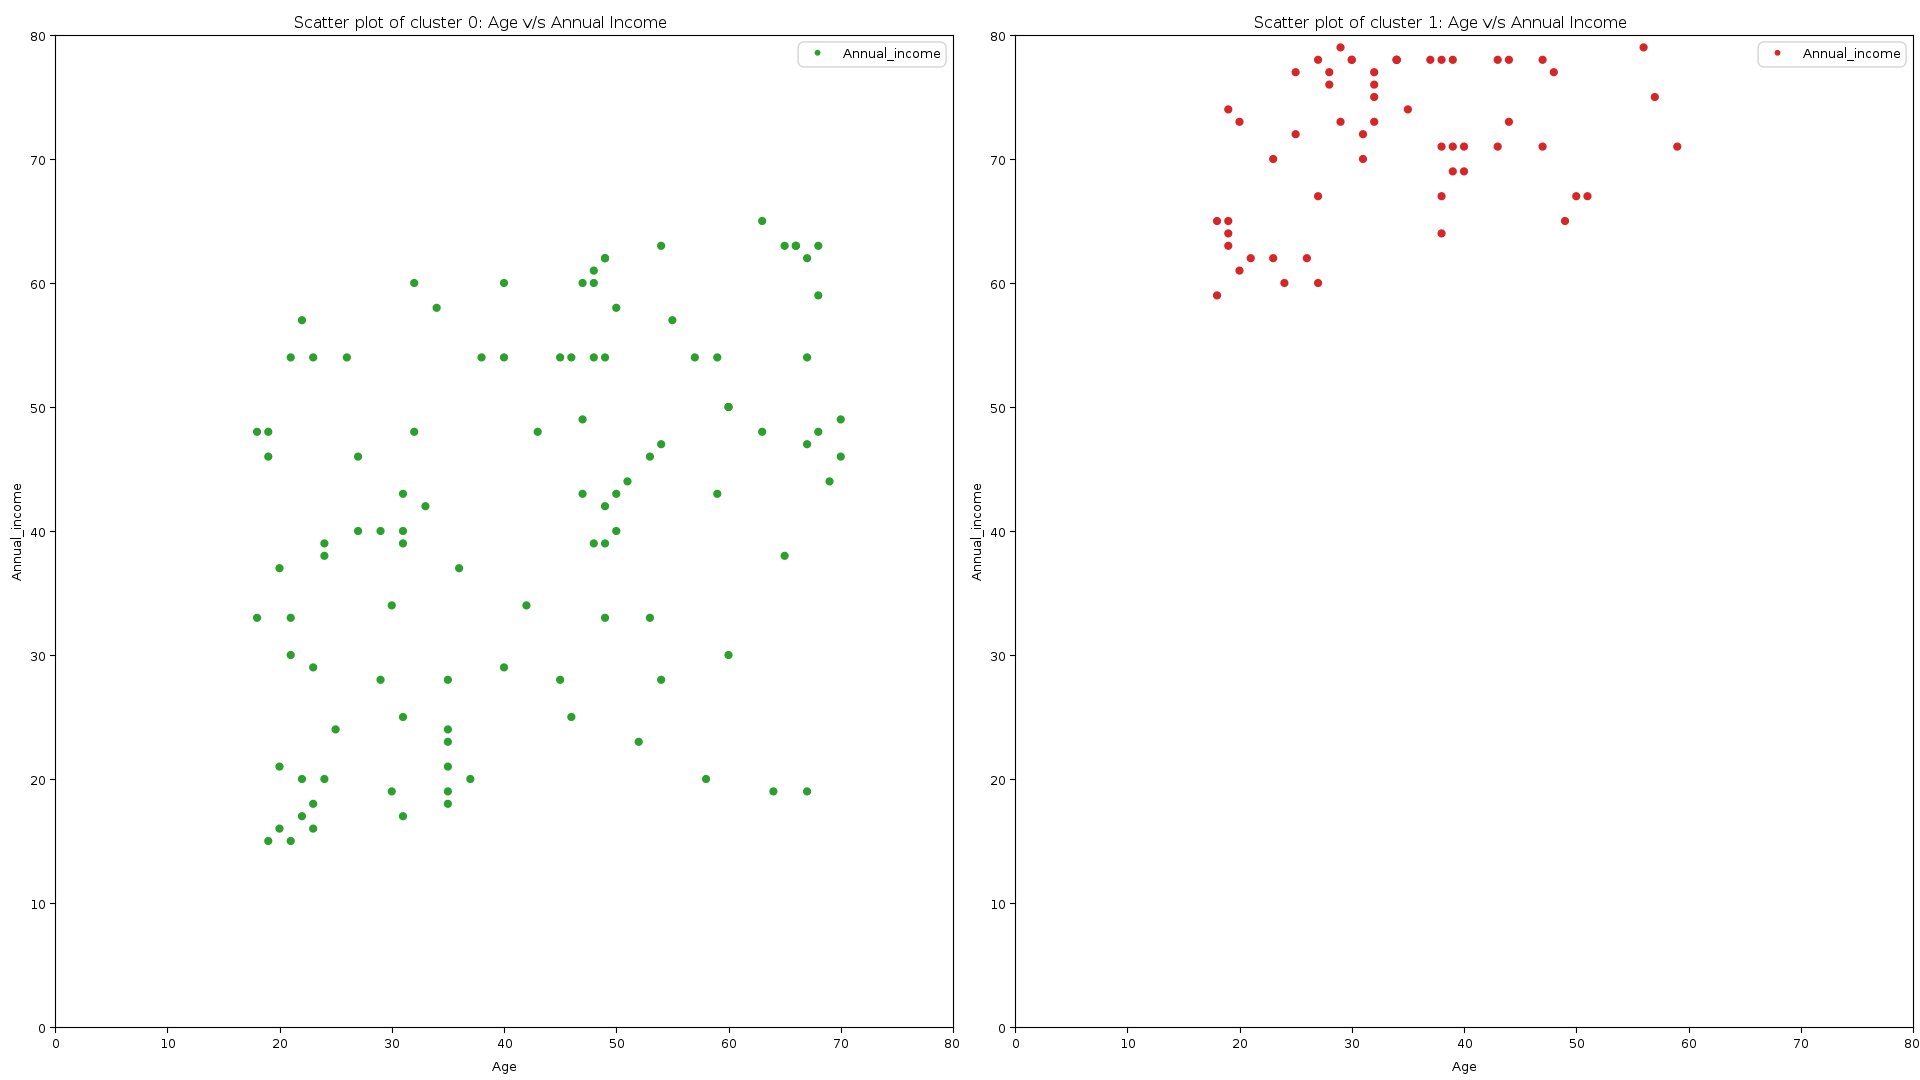

In [20]:
p.show()

### Number of clusters = 5.

In [21]:
# Number of cluster = 5
KMeans_out = KMeans(id_column='CustomerID', 
                    target_columns=['Age', 'Spending_Score'], 
                    data=df_mall, 
                    num_init=10, 
                    num_clusters=5, 
                    iter_max= 30
                   )
KMeansPredict_out = KMeansPredict(object=KMeans_out.result, data=df_mall, accumulate=['Gender', 'Age', 'Annual_income', 'Spending_Score'])

In [22]:
KMeans_out.model_data

td_clusterid_kmeans,Age,Spending_Score,td_size_kmeans,td_withinss_kmeans,CustomerID,td_modelinfo_kmeans
2,45.45454545454545,40.515151515151516,33,2484.4242424242548,None,None
4,25.775,50.775,40,4427.950000000012,None,None
None,None,None,None,None,None,Converged : True
None,None,None,None,None,None,Number of Iterations : 10
None,None,None,None,None,None,Total_WithinSS : 2.38726975506950E+04
None,None,None,None,None,None,Between_SS : 1.47662802449305E+05
None,None,None,None,None,None,Number of Clusters : 5
3,43.095238095238095,12.880952380952381,42,8380.023809523846,None,None
1,61.035714285714285,51.32142857142857,28,2415.071428571362,None,None
0,30.17543859649123,82.35087719298245,57,6165.228070175508,None,None


In [23]:
KMeansPredict_out.result

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
6,0,Female,22.0,17,76.0
10,0,Female,30.0,19,72.0
12,0,Female,35.0,19,99.0
1,4,Male,19.0,15,39.0
5,4,Female,31.0,17,40.0
7,3,Female,35.0,18,6.0
9,3,Male,64.0,19,3.0
11,3,Male,67.0,19,14.0
3,3,Female,20.0,16,6.0
8,0,Female,23.0,18,94.0


In [24]:
# Create dataframe for all identified clusters.
dfc1 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 0]
dfc2 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 1]
dfc3 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 2]
dfc4 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 3]
dfc5 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 4]

In [25]:
# Function to create a figure and a set of subplots. The function makes it convenient to create common layouts of subplots, including the enclosing figure object.
# This will help to create a figure with 2 subplots in 1 row. fig and axes is passed to plot(). 
fig, axes = subplots(nrows=2, ncols=3) 

In [26]:
p = dfc1.plot(x=dfc1.Spending_Score, y=dfc1.Age, ax=axes[0], xlim=(0,150), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 0: Age v/s Spending Score", style="green", marker="*")

p = dfc2.plot(x=dfc2.Spending_Score, y=dfc2.Age, ax=axes[1], xlim=(0,150), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 1: Age v/s Spending Score", style="red", marker="p")

p = dfc3.plot(x=dfc3.Spending_Score, y=dfc3.Age, ax=axes[2], xlim=(0,150), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 2: Age v/s Spending Score", style="orange", marker="1")

p = dfc4.plot(x=dfc4.Spending_Score, y=dfc4.Age, ax=axes[3], xlim=(0,150), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 3: Age v/s Spending Score", style="gray", marker=".")

p = dfc5.plot(x=dfc5.Spending_Score, y=dfc5.Age, ax=axes[4], xlim=(0,150), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 4: Age v/s Spending Score", style="pink", marker="D")

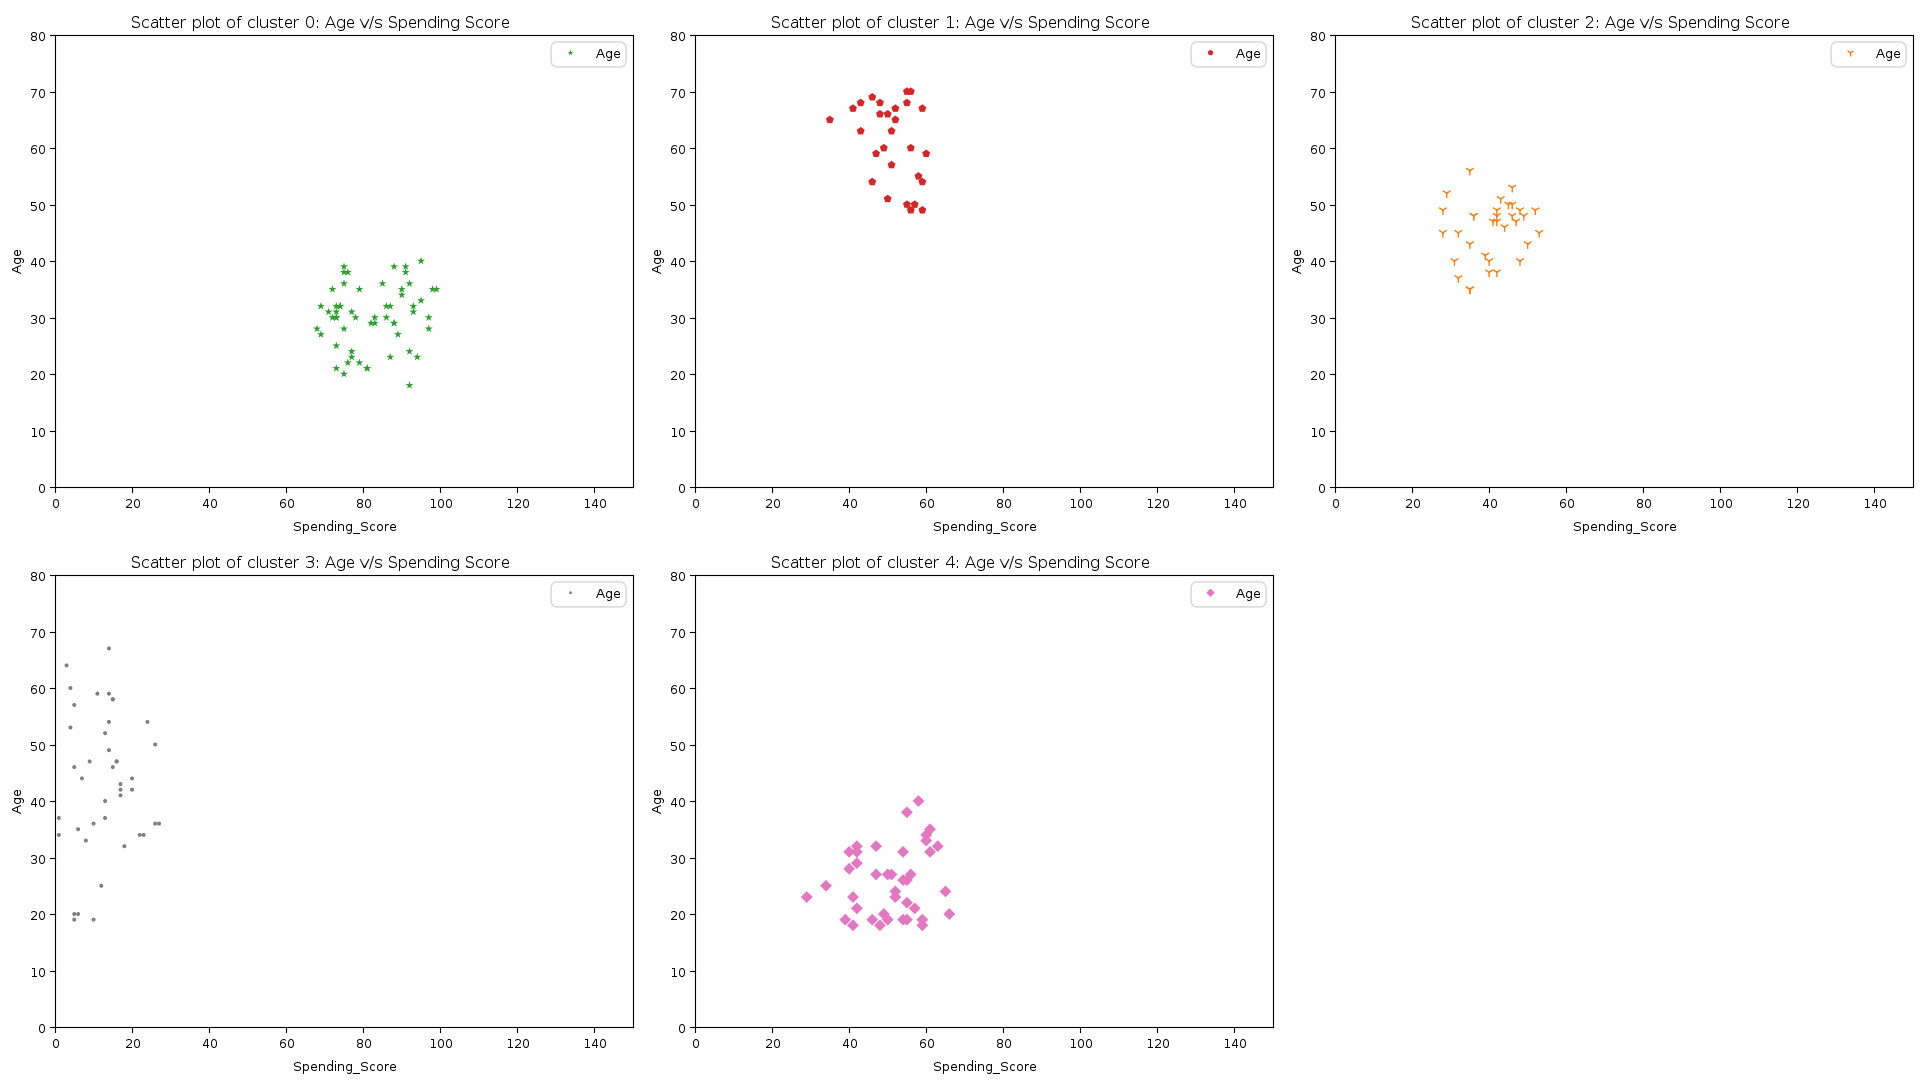

In [27]:
p.show()

### Number of clusters = 6.

In [28]:
KMeans_out = KMeans(id_column='CustomerID', 
                    target_columns=['Age', 'Spending_Score'], 
                    data=df_mall, 
                    num_init=10, 
                    num_clusters=6, 
                    iter_max= 30
                   )

In [29]:
KMeans_out.result

td_clusterid_kmeans,Age,Spending_Score,td_size_kmeans,td_withinss_kmeans,CustomerID,td_modelinfo_kmeans
None,None,None,None,None,None,Between_SS : 1.51817982691115E+05
None,None,None,None,None,None,Converged : True
0,32.69565217391305,15.304347826086957,23,3327.739130434784,None,None
5,29.0,73.17142857142858,35,2000.9714285714435,None,None
1,27.634146341463413,47.926829268292686,41,4550.29268292684,None,None
4,55.708333333333336,48.229166666666664,48,5694.395833333256,None,None
2,51.88461538461539,15.307692307692308,26,2876.192307692312,None,None
3,31.37037037037037,90.70370370370371,27,1267.925925925956,None,None
None,None,None,None,None,None,Number of Clusters : 6
None,None,None,None,None,None,Total_WithinSS : 1.97175173088846E+04


In [30]:
KMeansPredict_out = KMeansPredict(object=KMeans_out.result, data=df_mall, accumulate=['Gender', 'Age', 'Annual_income', 'Spending_Score'])

In [31]:
KMeansPredict_out.result.head()

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
3,0,Female,20.0,16,6.0
5,1,Female,31.0,17,40.0
6,5,Female,22.0,17,76.0
7,0,Female,35.0,18,6.0
9,2,Male,64.0,19,3.0
10,5,Female,30.0,19,72.0
8,3,Female,23.0,18,94.0
4,5,Female,23.0,16,77.0
2,5,Male,21.0,15,81.0
1,1,Male,19.0,15,39.0


In [32]:
# Create dataframe for all identified clusters.
dfc1 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 0]
dfc2 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 1]
dfc3 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 2]
dfc4 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 3]
dfc5 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 4]
dfc6 = KMeansPredict_out.result[KMeansPredict_out.result.td_clusterid_kmeans == 5]

In [33]:
# Print the dataframe.
dfc6

CustomerID,td_clusterid_kmeans,Gender,Age,Annual_income,Spending_Score
6,5,Female,22.0,17,76.0
14,5,Female,24.0,20,77.0
16,5,Male,22.0,20,79.0
18,5,Male,20.0,21,66.0
24,5,Male,31.0,25,73.0
26,5,Male,29.0,28,82.0
22,5,Male,25.0,24,73.0
10,5,Female,30.0,19,72.0
4,5,Female,23.0,16,77.0
2,5,Male,21.0,15,81.0


In [34]:
# Function to create a figure and a set of subplots. The function makes it convenient to create common layouts of subplots, including the enclosing figure object.
# This will help to create a figure with 6 subplots in 2 rows. fig and axes is passed to plot(). 
fig, axes = subplots(nrows=3, ncols=2) 

In [35]:
p = dfc1.plot(x=dfc1.Spending_Score, y=dfc1.Age, ax=axes[0], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 0: Age v/s Spending Score", style="green", marker="*")

p = dfc2.plot(x=dfc2.Spending_Score, y=dfc2.Age, ax=axes[1], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 1: Age v/s Spending Score", style="red", marker="p")

p = dfc3.plot(x=dfc3.Spending_Score, y=dfc3.Age, ax=axes[2], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 2: Age v/s Spending Score", style="orange", marker="1")

p = dfc4.plot(x=dfc4.Spending_Score, y=dfc4.Age, ax=axes[3], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 3: Age v/s Spending Score", style="gray", marker=".")

p = dfc5.plot(x=dfc5.Spending_Score, y=dfc5.Age, ax=axes[4], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 4: Age v/s Spending Score", style="pink", marker="D")

p = dfc6.plot(x=dfc6.Spending_Score, y=dfc6.Age, ax=axes[5], xlim=(0,100), ylim=(0,80), figure=fig, kind="scatter", title="Scatter plot of cluster 5: Age v/s Spending Score", style="purple", marker="P")


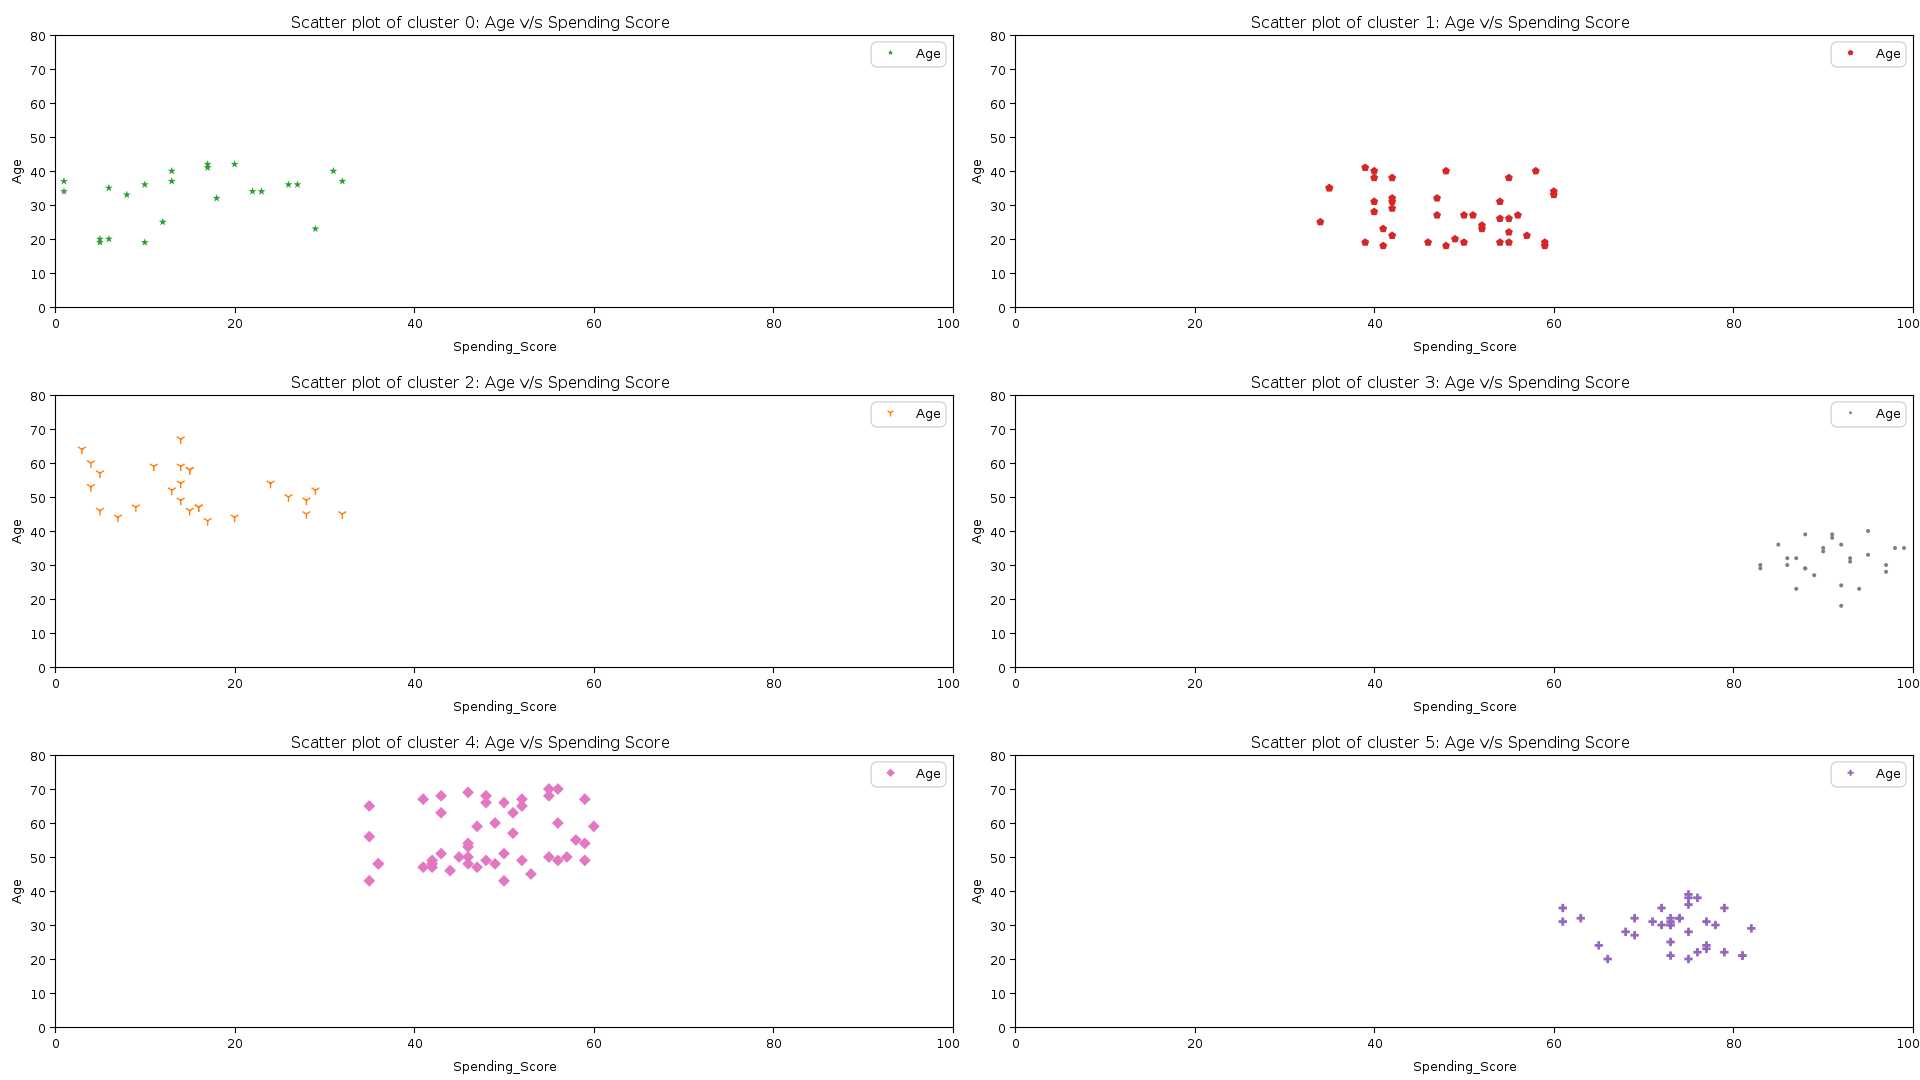

In [36]:
p.show()

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>7. Cleanup</b>

In [37]:
db_drop_table(table_name='mall_data')

True

In [38]:
remove_context()

True